In [1]:
import csv
import numpy as np
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir,'..','params'))
from load_params import *

# Open and read a CSV file
with open('rho_ECOSTRESS_S2A.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    A = np.array([[float(value) for value in row[1:]]  for row in csv_reader])
#print(A)


In [2]:
# Rajout des csts
T_9 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq9
T_8_new = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8_new
T_8 = matrix_s2l2ab4b3b2_to_xyzd65_sovdat2019_eq8

In [3]:
def RVB_to_XYZ(T, A):
    B = A @ T
    return B

B = RVB_to_XYZ(T_9, A)

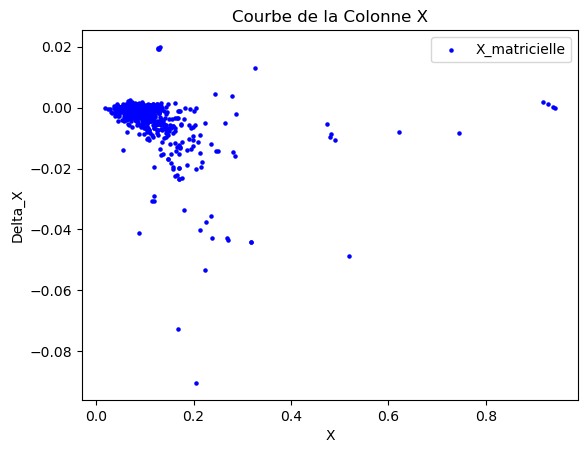

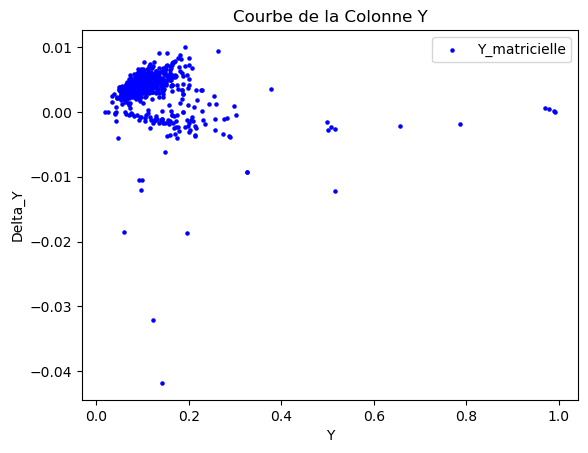

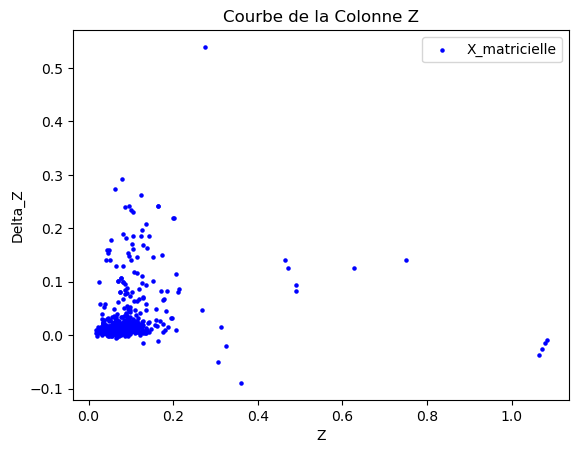

In [4]:
#Tracer les graphes
import matplotlib.pyplot as plt

# Open and read a CSV file
with open('xyz_ECOSTRESS.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Ignorer la première ligne (en-tête)
    next(csv_reader)
    
    # Ignorer la première colonne (en-tête)
    XYZ = np.array([[float(value) for value in row[1:]]  for row in csv_reader])

np.save('XYZ.npy', XYZ)    

# Extraire les trois colonnes sans cst
X_sim = B[:, 0]  # Première colonne
Y_sim = B[:, 1]  # Deuxième colonne
Z_sim = B[:, 2]  # Troisième colonne


X = XYZ[:,0]
Y = XYZ[:,1]
Z = XYZ[:,2]

x = np.linspace(0, 10, len(B))

# Effectuer une régression linéaire
X_coefficients_sim = np.polyfit(x, X_sim, 1)  # Degré 1 pour une droite
X_fit_sim = np.polyval(X_coefficients_sim, x) 

Y_coefficients_sim = np.polyfit(x, Y_sim, 1)  # Degré 1 pour une droite
Y_fit_sim = np.polyval(Y_coefficients_sim, x) 

Z_coefficients_sim = np.polyfit(x, Z_sim, 1)  # Degré 1 pour une droite
Z_fit_sim = np.polyval(Z_coefficients_sim, x) 


# Fenêtre pour la première colonne
plt.figure(1)  # Créer une nouvelle figure (fenêtre)
#plt.plot(x, X_fit_sim, label='régression linéaire X_simulé', color='red')
plt.scatter(X, X_sim-X, label="X_matricielle", color='blue', s=5)
#plt.scatter(X_sim, label="X_simulé", color='red', s=5)
plt.xlabel('X')
plt.ylabel('Delta_X')
plt.title('Courbe de la Colonne X')
plt.legend()


# Fenêtre pour la deuxième colonne
plt.figure(2)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Y, Y_sim-Y, label="Y_matricielle", color='blue', s=5)
plt.xlabel('Y')
plt.ylabel('Delta_Y')
plt.title('Courbe de la Colonne Y')
plt.legend()

# Fenêtre pour la troisième colonne

plt.figure(3)  # Créer une nouvelle figure (fenêtre)
plt.scatter(Z, Z_sim-Z, label="X_matricielle", color='blue', s=5)
plt.xlabel('Z')
plt.ylabel('Delta_Z')
plt.title('Courbe de la Colonne Z')
plt.legend()






# Afficher le graphique
plt.show()





In [5]:
# Calcul de l'erreur quadratique moyenne (MSE)
mse_X = np.mean((X_sim - X)**2)
mse_Y = np.mean((Y_sim - Y)**2)
mse_Z = np.mean((Z_sim - Z)**2)



# Racine carrée de l'erreur quadratique moyenne (RMSE)
rmse_X = np.sqrt(mse_X)
rmse_Y = np.sqrt(mse_Y)
rmse_Z = np.sqrt(mse_Z)


print(f"RMSE: {rmse_X}, {rmse_Y}, {rmse_Z}")


RMSE: 0.009422809681145205, 0.0049736722000439555, 0.057877188998037794


In [6]:
from sklearn.metrics import r2_score
r_squared_X = r2_score(X_sim, X)
r_squared_Y = r2_score(Y_sim, Y)
r_squared_Z = r2_score(Z_sim, Z)

print(f"R^2: {r_squared_X},{r_squared_Y},{r_squared_Z}")

R^2: 0.988933619640031,0.9972154302977294,0.7494263670654389


In [10]:
#Tableau de comparaison des matrices T 
import pandas as pd

# Créer un tableau
R2 = [
    [0.9958227426680727, 0.9929149658017333, 0.988933619640031],
    [0.9961728979098889, 0.99698183950396, 0.9972154302977294],
    [0.6666214009177471, 0.6719600589292618, 0.7494263670654389],
]
RMSE = [
    [0.0059433512959871536,  0.008027233876960034, 0.009422809681145205],
    [0.005943773172168012, 0.005262969740525731, 0.0049736722000439555],
    [0.07778775376221234, 0.06939324365433368,  0.057877188998037794],
]


# Convertir en DataFrame et afficher
RMSE = pd.DataFrame(RMSE, columns=['T8_new', 'T8', 'T9'], index = ['RMSE_X', 'RMSE_Y', 'RMSE_Z'])
R2 = pd.DataFrame(R2, columns=['T8_new', 'T8', 'T9'], index = ['R^2_X', 'R^2_Y', 'R^2_Z'])
print(RMSE)
print(R2)
#RMSE.to_csv("RMSE.csv", index=True)  # index=True pour inclure les noms de lignes


          T8_new        T8        T9
RMSE_X  0.005943  0.008027  0.009423
RMSE_Y  0.005944  0.005263  0.004974
RMSE_Z  0.077788  0.069393  0.057877
         T8_new        T8        T9
R^2_X  0.995823  0.992915  0.988934
R^2_Y  0.996173  0.996982  0.997215
R^2_Z  0.666621  0.671960  0.749426
